In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


# 데이터 다운로드 및 분석

In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline
print('yes')

yes


In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


/tmp/ipykernel_15/2284205290.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


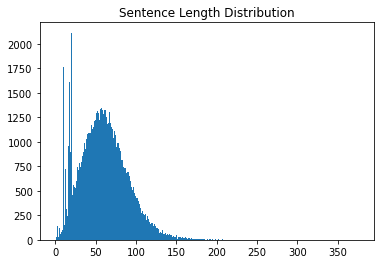

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


/tmp/ipykernel_15/390535405.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


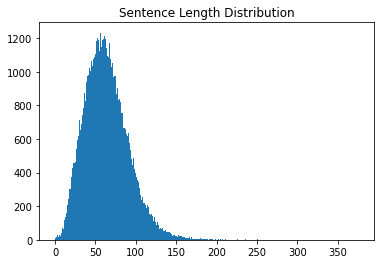

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/tmp/ipykernel_15/1483434014.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


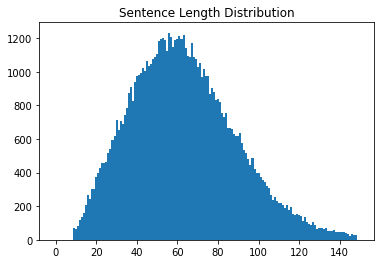

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 공백 기반 토큰화

In [10]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [11]:
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())


In [12]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [13]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


# 형태소 기반 토큰화

In [14]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [15]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [16]:
# Case 1
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

섹시 한 분위기 를 조성 하 는데 있 어 조명 만큼 좋 은 것 은 없 다 .


In [17]:
# Case 2
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)


섹시 한 분위기 를 조성 하 는데 있 어 조명 만큼 좋 은 것 은 없 다 . 


# 프로젝트: SentencePiece 사용하기

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.22.2
3.4.3
0.5.2


# Step 2. SentencePiece 모델 학습

In [19]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*


sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Mar 23 08:43 korean_spm.model
-rw-r--r-- 1 root root 146213 Mar 23 08:43 korean_spm.vocab


In [20]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


# Step 3. Tokenizer 함수 작성

In [21]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [22]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]


# Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

데이터 로드

In [23]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터 불러오기 
train_data = pd.read_table('~/aiffel/sentiment_classification/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [24]:
# 결측치 제거
print(train_data.shape)
refined_train_data = train_data.dropna(axis=0)
print(refined_train_data)

(150000, 3)
              id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[149995 rows x 3 columns]


문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 56


/tmp/ipykernel_15/3037758166.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


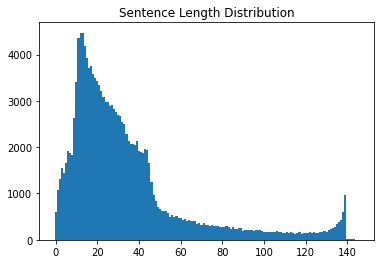

In [25]:
min_len = 999
max_len = 0
sum_len = 0

for sen in refined_train_data['document']:        
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in refined_train_data['document']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [26]:
print(refined_train_data.shape)
refined_train_data.drop_duplicates("document", keep="first")
print(refined_train_data.shape)

# 중거되는 곳 제거

(149995, 3)
(149995, 3)


In [27]:
check_sentence_with_length(refined_train_data['document'],1)

아
잼
1
4
4
굿
짱
휴
.
1
굿
음
?
?
ㅎ
굿
ㅋ
굿
즐
♥
굳
ㅋ
네
ㅎ
ㅋ
굿
ㅇ
k
.
굿
굿
굳
ㅠ
?
1
ㅋ
굿
쒯
굿
굿
굳
♬
굿
토
ㅋ
ㅋ
굿
ㅋ
굿
O
똥
ㅎ
.
굿
ㅎ
짱
굳
굿
굿
짱
?
z
굿
짱
음
굳
ㅇ
헐
굳
굳
굿
굿
굿
삼
꽝
굿
굿
굿
굿
ㅎ
굳
굿
4
!
?
ㅎ
1
굳
.
ㅎ
풉
아
굿
똥
ㅅ
왜
ㄴ
굳
쉣
봐
z


/tmp/ipykernel_15/4112843781.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


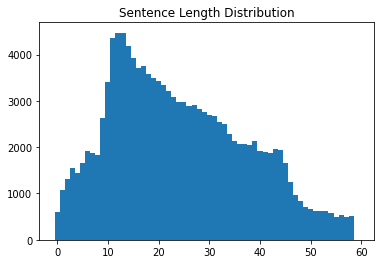

In [28]:
max_len = 60
min_len = 1

# 길이 조건에 맞는 문장만 선택함.
filtered_corpus = [s for s in refined_train_data['document'] if (len(s) < max_len) & (len(s) >= min_len)]
filtered_train_data = refined_train_data[refined_train_data['document'].map(len) < max_len]
filtered_train_data = filtered_train_data[filtered_train_data['document'].map(len) >= min_len]

# 분포도
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [29]:
print(refined_train_data.shape)
print(filtered_train_data.shape)
print(len(filtered_corpus))

(149995, 3)
(128937, 3)
128937


In [30]:
filtered_train_data.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0


KoNLPy 형태소 분석기

In [31]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [32]:
mecab_corpus[0]

['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리']

In [33]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 42461


In [34]:
mecab_tensor[100]

array([257,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [35]:
mecab_tensor.shape

(128937, 43)

In [36]:
# Case 1 : tokenizer.sequences_to_texts()
mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])

['대박']

데이터 분리 

In [37]:
mecab_tensor[1]

array([ 834,    1,   14,  480,  537,  608,    3,  134,    1,   69, 1598,
         65, 1077,  907,   20,   55,  343,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [38]:
mecab_tokenizer.index_word

{1: '.',
 2: '이',
 3: '영화',
 4: '는',
 5: '다',
 6: '고',
 7: '하',
 8: '의',
 9: '가',
 10: '도',
 11: '은',
 12: '에',
 13: '을',
 14: '..',
 15: '보',
 16: '한',
 17: '!',
 18: '게',
 19: ',',
 20: '지',
 21: '들',
 22: '없',
 23: '?',
 24: '있',
 25: '좋',
 26: '를',
 27: '나',
 28: '었',
 29: '만',
 30: '너무',
 31: '재밌',
 32: '봤',
 33: '는데',
 34: '음',
 35: '정말',
 36: '점',
 37: '아',
 38: '적',
 39: '안',
 40: '네요',
 41: '네',
 42: 'ㅋㅋ',
 43: '진짜',
 44: '최고',
 45: '어',
 46: '로',
 47: '으로',
 48: '~',
 49: '지만',
 50: '했',
 51: '것',
 52: '기',
 53: '같',
 54: '았',
 55: '않',
 56: '어요',
 57: '평점',
 58: '에서',
 59: '거',
 60: '수',
 61: '말',
 62: '면',
 63: '내',
 64: '잘',
 65: '연기',
 66: 'ㅋㅋㅋ',
 67: '되',
 68: '이런',
 69: '...',
 70: '인',
 71: '과',
 72: '주',
 73: '왜',
 74: '1',
 75: '감동',
 76: '던',
 77: '습니다',
 78: '와',
 79: '해',
 80: '싶',
 81: '재미있',
 82: '할',
 83: '스토리',
 84: '잼',
 85: '드라마',
 86: '재미',
 87: '겠',
 88: '더',
 89: '함',
 90: '본',
 91: '지루',
 92: '듯',
 93: '볼',
 94: '재미없',
 95: '아니',
 96: '뭐',
 97: '때',
 98:

In [39]:
mecab_tokenizer.word_index

{'.': 1,
 '이': 2,
 '영화': 3,
 '는': 4,
 '다': 5,
 '고': 6,
 '하': 7,
 '의': 8,
 '가': 9,
 '도': 10,
 '은': 11,
 '에': 12,
 '을': 13,
 '..': 14,
 '보': 15,
 '한': 16,
 '!': 17,
 '게': 18,
 ',': 19,
 '지': 20,
 '들': 21,
 '없': 22,
 '?': 23,
 '있': 24,
 '좋': 25,
 '를': 26,
 '나': 27,
 '었': 28,
 '만': 29,
 '너무': 30,
 '재밌': 31,
 '봤': 32,
 '는데': 33,
 '음': 34,
 '정말': 35,
 '점': 36,
 '아': 37,
 '적': 38,
 '안': 39,
 '네요': 40,
 '네': 41,
 'ㅋㅋ': 42,
 '진짜': 43,
 '최고': 44,
 '어': 45,
 '로': 46,
 '으로': 47,
 '~': 48,
 '지만': 49,
 '했': 50,
 '것': 51,
 '기': 52,
 '같': 53,
 '았': 54,
 '않': 55,
 '어요': 56,
 '평점': 57,
 '에서': 58,
 '거': 59,
 '수': 60,
 '말': 61,
 '면': 62,
 '내': 63,
 '잘': 64,
 '연기': 65,
 'ㅋㅋㅋ': 66,
 '되': 67,
 '이런': 68,
 '...': 69,
 '인': 70,
 '과': 71,
 '주': 72,
 '왜': 73,
 '1': 74,
 '감동': 75,
 '던': 76,
 '습니다': 77,
 '와': 78,
 '해': 79,
 '싶': 80,
 '재미있': 81,
 '할': 82,
 '스토리': 83,
 '잼': 84,
 '드라마': 85,
 '재미': 86,
 '겠': 87,
 '더': 88,
 '함': 89,
 '본': 90,
 '지루': 91,
 '듯': 92,
 '볼': 93,
 '재미없': 94,
 '아니': 95,
 '뭐': 96,
 '때': 97,
 '좀'

In [40]:
filtered_train_data.shape

(128937, 3)

In [41]:
filtered_train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0


In [42]:
X_train = mecab_tensor

In [43]:
y_train = filtered_train_data['label']

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_train[0])
print(y_train[0])

(128937, 43)
(128937,)
[ 37  88 965   1   1  43 244  27  40 807   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
0


In [45]:
X_val = X_train[:20000]
y_val = y_train[:20000]

partial_X_train = X_train[20000:100000]
partial_y_train = y_train[20000:100000]
X_test = X_train[100000:]
y_test = y_train[100000:]

print(X_val.shape)
print(y_val.shape)
print(partial_X_train.shape)
print(partial_y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20000, 43)
(20000,)
(80000, 43)
(80000,)
(28937, 43)
(28937,)


RNN 모델 적용

In [46]:
len(mecab_tokenizer.word_index)

42461

In [47]:
vocab_size = 42462  # 어휘 사전의 크기(10000개의 단어)
word_vector_dim = 512 # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)
  
model_rnn = keras.Sequential()
model_rnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(keras.layers.LSTM(64))   
model_rnn.add(keras.layers.Dense(8, activation='relu'))
model_rnn.add(keras.layers.Dense(1, activation='relu'))  

In [48]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         21740544  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                147712    
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 21,888,785
Trainable params: 21,888,785
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10 

history = model_rnn.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
157/157 [==============================] - 197s 1s/step - loss: 0.6258 - accuracy: 0.6129 - val_loss: 0.4025 - val_accuracy: 0.8321
Epoch 2/10
157/157 [==============================] - 194s 1s/step - loss: 0.3981 - accuracy: 0.8397 - val_loss: 0.3645 - val_accuracy: 0.8450
Epoch 3/10
157/157 [==============================] - 192s 1s/step - loss: 0.3223 - accuracy: 0.8836 - val_loss: 0.3659 - val_accuracy: 0.8475
Epoch 4/10
157/157 [==============================] - 193s 1s/step - loss: 0.2560 - accuracy: 0.9102 - val_loss: 0.3559 - val_accuracy: 0.8468
Epoch 5/10
157/157 [==============================] - 195s 1s/step - loss: 0.1988 - accuracy: 0.9312 - val_loss: 0.4000 - val_accuracy: 0.8489
Epoch 6/10
157/157 [==============================] - 195s 1s/step - loss: 0.2106 - accuracy: 0.9405 - val_loss: 0.3777 - val_accuracy: 0.8469
Epoch 7/10
157/157 [==============================] - 197s 1s/step - loss: 0.2087 - accuracy: 0.9446 - val_loss: 0.5177 - val_accuracy: 0.8436

In [50]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


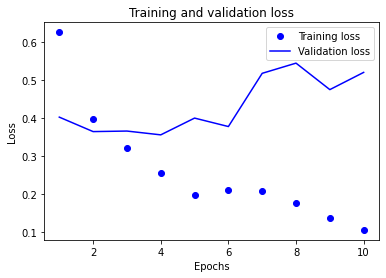

In [51]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# bo=파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b=파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

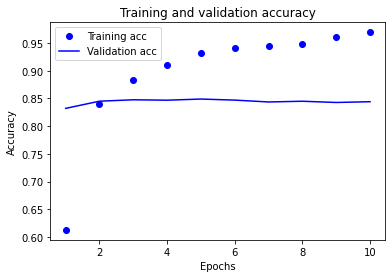

In [52]:
# 시각화 초기화
plt.clf()  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [53]:
results = model_rnn.evaluate(X_test,  y_test, verbose=2)

print(results)

905/905 - 22s - loss: 0.5036 - accuracy: 0.8438
[0.5036489367485046, 0.8437985777854919]


SentencePiece

In [54]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 40000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=40000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 40000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_

-rw-r--r-- 1 root root 1036224 Mar 23 09:17 korean_spm.model
-rw-r--r-- 1 root root  834310 Mar 23 09:17 korean_spm.vocab


In [55]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[7391, 14148, 2671, 32245, 3]
['▁아버지가', '방에', '들어', '가신다', '.']
아버지가방에들어가신다.


In [56]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [57]:
#sp_tokenize(s, corpus) 사용
tensor, word_index, index_word = sp_tokenize(s, filtered_corpus)

In [58]:
tensor.shape

(128937, 38)

In [59]:
sX_train=tensor

In [60]:
sX_val = sX_train[:20000]
y_val = y_train[:20000]

partial_sX_train = sX_train[20000:100000]
partial_y_train = y_train[20000:100000]
sX_test = sX_train[100000:]
y_test = y_train[100000:]

print(sX_val.shape)
print(y_val.shape)
print(partial_sX_train.shape)
print(partial_y_train.shape)
print(sX_test.shape)
print(y_test.shape)

(20000, 38)
(20000,)
(80000, 38)
(80000,)
(28937, 38)
(28937,)


In [61]:
len(word_index)

40000

In [62]:
vocab_size = 40000  
word_vector_dim = 512 
  
model_rnn = keras.Sequential()
model_rnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(keras.layers.LSTM(64))   
model_rnn.add(keras.layers.Dense(8, activation='relu'))
model_rnn.add(keras.layers.Dense(1, activation='relu'))  
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 512)         20480000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                147712    
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 20,628,241
Trainable params: 20,628,241
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  

history = model_rnn.fit(partial_sX_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(sX_val, y_val),
                    verbose=1)

Epoch 1/20
157/157 [==============================] - 177s 1s/step - loss: 0.7188 - accuracy: 0.5044 - val_loss: 0.6917 - val_accuracy: 0.5039
Epoch 2/20
157/157 [==============================] - 176s 1s/step - loss: 0.6901 - accuracy: 0.5463 - val_loss: 0.6861 - val_accuracy: 0.5600
Epoch 3/20
157/157 [==============================] - 177s 1s/step - loss: 0.6582 - accuracy: 0.6411 - val_loss: 0.4449 - val_accuracy: 0.8147
Epoch 4/20
157/157 [==============================] - 177s 1s/step - loss: 0.3793 - accuracy: 0.8580 - val_loss: 0.3844 - val_accuracy: 0.8440
Epoch 5/20
157/157 [==============================] - 175s 1s/step - loss: 0.2329 - accuracy: 0.9180 - val_loss: 0.3784 - val_accuracy: 0.8432
Epoch 6/20
157/157 [==============================] - 176s 1s/step - loss: 0.1721 - accuracy: 0.9445 - val_loss: 0.4287 - val_accuracy: 0.8427
Epoch 7/20
157/157 [==============================] - 175s 1s/step - loss: 0.1335 - accuracy: 0.9618 - val_loss: 0.4864 - val_accuracy: 0.8378

In [64]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


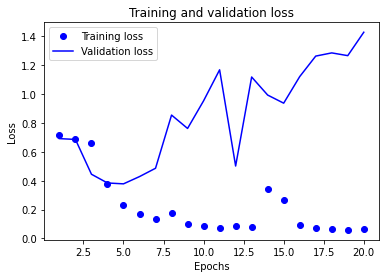

In [65]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# bo=파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b=파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

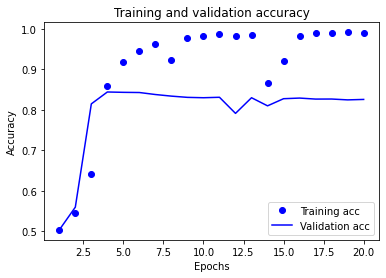

In [66]:
# 시각화 초기화
plt.clf()   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [67]:
# 테스트셋 모델 평가
results = model_rnn.evaluate(sX_test,  y_test, verbose=2)

print(results)

905/905 - 21s - loss: 1.4561 - accuracy: 0.8245
[1.4561409950256348, 0.8245153427124023]


In [68]:
vocab_size = 15000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)

s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

tensor, word_index, index_word = sp_tokenize(s, filtered_corpus)
tensor.shape
sX_train=tensor
sX_val = sX_train[:20000]
y_val = y_train[:20000]
partial_sX_train = sX_train[20000:100000]
partial_y_train = y_train[20000:100000]
sX_test = sX_train[100000:]
y_test = y_train[100000:]

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=15000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 15000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_

In [80]:
word_vector_dim = 128 
model_rnn = keras.Sequential()
model_rnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(keras.layers.LSTM(8)) 
model_rnn.add(keras.layers.Dense(8, activation='relu'))
model_rnn.add(keras.layers.Dense(1, activation='relu'))  
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
epochs=15

In [81]:
model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         1920000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 4384      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 1,924,465
Trainable params: 1,924,465
Non-trainable params: 0
_________________________________________________________________


In [82]:
history = model_rnn.fit(partial_sX_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(sX_val, y_val),
                    verbose=1)

Epoch 1/15
157/157 [==============================] - 19s 111ms/step - loss: 7.7580 - accuracy: 0.4970 - val_loss: 7.7356 - val_accuracy: 0.4985
Epoch 2/15
157/157 [==============================] - 17s 110ms/step - loss: 7.7580 - accuracy: 0.4970 - val_loss: 7.7356 - val_accuracy: 0.4985
Epoch 3/15
157/157 [==============================] - 18s 113ms/step - loss: 7.7580 - accuracy: 0.4970 - val_loss: 7.7356 - val_accuracy: 0.4985
Epoch 4/15
157/157 [==============================] - 17s 107ms/step - loss: 7.7580 - accuracy: 0.4970 - val_loss: 7.7356 - val_accuracy: 0.4985
Epoch 5/15
157/157 [==============================] - 17s 110ms/step - loss: 7.7580 - accuracy: 0.4970 - val_loss: 7.7356 - val_accuracy: 0.4985
Epoch 6/15
157/157 [==============================] - 18s 113ms/step - loss: 7.7580 - accuracy: 0.4970 - val_loss: 7.7356 - val_accuracy: 0.4985
Epoch 7/15
157/157 [==============================] - 18s 113ms/step - loss: 7.7580 - accuracy: 0.4970 - val_loss: 7.7356 - val_ac

In [83]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


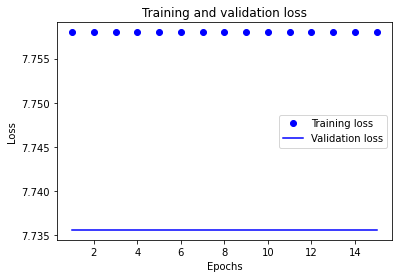

In [84]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# bo=파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b=파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

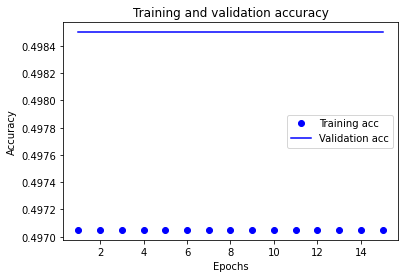

In [87]:
# 시각화 초기화
plt.clf()  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [88]:
# 테스트셋 모델 평가
results = model_rnn.evaluate(sX_test,  y_test, verbose=2)

print(results)

905/905 - 5s - loss: 7.7209 - accuracy: 0.4994
[7.720928192138672, 0.4994297921657562]


정확도 비교 

Mecab (vocab_size = 42462) : 0.8437985777854919
SentencePiece (vocab_size = 40000) : 0.8245153427124023
SentencePiece (vocab_size = 15000) : 0.4994297921657562

# 회고록

고잉디퍼로 넘어가면서 어려워졌다. 1번 토큰화를 다시 복습하면서 코드작은은 노드에서 작성했던 것들을 다시 보면서 작성하였다. 
정확도를 비교 했을 때 Mecab 적용했을 때가 적확도가 높았다.  SentencePiece 적용시 vocab_size 사이즈를 높이는 것이 정확도를 높이는 데 도움이 되었고 마지막에 vocab_size를 낮췄는데 정확도가 확연히 낮아졌다. 
몸이 아파서 작성하는데 시간이 많이 걸렸다. 
